# Superstore customer sales analysis

The Superstore is very large supermarket, often selling household goods, clothes, and electrical goods.

A superstore with operations across the City of US(United states) aims to understand some features and also tries to get vital information from their data. They also focus on their selling item,customers and also predict 3 month customer lifetime value.

# Import libraries

In [33]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

%matplotlib inline

# Data Import

In [34]:
data = pd.read_csv("Superstore_sales.csv")

In [35]:
data

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2019-152156  2019-11-08  2019-11-11    Second Class   
1          2  CA-2019-152156  2019-11-08  2019-11-11    Second Class   
2          3  CA-2019-138688  2019-06-12  2019-06-16    Second Class   
3          4  US-2018-108966  2018-10-11  2018-10-18  Standard Class   
4          5  US-2018-108966  2018-10-11  2018-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2017-110422  2017-01-21  2017-01-23    Second Class   
9990    9991  CA-2020-121258  2020-02-26  2020-03-03  Standard Class   
9991    9992  CA-2020-121258  2020-02-26  2020-03-03  Standard Class   
9992    9993  CA-2020-121258  2020-02-26  2020-03-03  Standard Class   
9993    9994  CA-2020-119914  2020-05-04  2020-05-09    Second Class   

     Customer ID     Customer Name    Segment Country/Region             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...     42420.0   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...     42420.0   South  FUR-CH-10000454        Furniture       Chairs   
2     ...     90036.0    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...     33311.0   South  FUR-TA-10000577        Furniture       Tables   
4     ...     33311.0   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...     33180.0   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...     92627.0    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...     92627.0    West  TEC-PH-10003645       Technology       Phones   
9992  ...     92627.0    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...     92683.0    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20 

# Data Exploration

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [37]:
data.shape

(9994, 21)

In [38]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [39]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [40]:
data["Product Name"].value_counts()

Staple envelope                                        48
Staples                                                46
Easy-staple paper                                      46
Avery Non-Stick Binders                                20
Staples in misc. colors                                19
                                                       ..
Socket Bluetooth Cordless Hand Scanner (CHS)            1
Boston 1900 Electric Pencil Sharpener                   1
Xerox 1901                                              1
Hewlett-Packard Desktjet 6988DT Refurbished Printer     1
Avaya IP Phone 1140E VoIP phone                         1
Name: Product Name, Length: 1849, dtype: int64

# Data Preprocessing
1.  Remove Null Values
2.  Remove Duplicate Values

In [41]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['Customer ID'])]

In [42]:
data.shape

(9994, 21)

In [43]:
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2019-152156  2019-11-08  2019-11-11    Second Class    CG-12520   
1       2  CA-2019-152156  2019-11-08  2019-11-11    Second Class    CG-12520   
2       3  CA-2019-138688  2019-06-12  2019-06-16    Second Class    DV-13045   
3       4  US-2018-108966  2018-10-11  2018-10-18  Standard Class    SO-20335   
4       5  US-2018-108966  2018-10-11  2018-10-18  Standard Class    SO-20335   

     Customer Name    Segment Country/Region             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10001798        Furniture    Bookcases   
1     42420.0   South  FUR-CH-10000454        Furniture       Chairs   
2     90036.0    West  OFF-LA-10000240  Office Supplies       Labels   
3     33311.0   South  FUR-TA-10000577        Furniture       Tables   
4     33311.0   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [44]:
# Removing duplicates
filtered_data=data[['Country/Region','Customer ID']].drop_duplicates()

In [45]:
filtered_data.shape

(793, 2)

In [46]:
filtered_data.head()

Country/Region Customer ID
0   United States    CG-12520
2   United States    DV-13045
3   United States    SO-20335
5   United States    BH-11710
12  United States    AA-10480

# Data Insights
   Top 10 country customer data

In [47]:
# Check the country wise distribution
data['Country/Region'].value_counts()

United States    9994
Name: Country/Region, dtype: int64

In [48]:
data.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9983.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55245.233297    229.858001     3.789574     0.156203   
std    2885.163629  32038.715955    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  57103.000000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

## Number of Sales per Category

In [49]:
category = data['Category'].unique()

In [50]:
StorebyCatOrderDate = data.groupby(['Category','Order Date'])

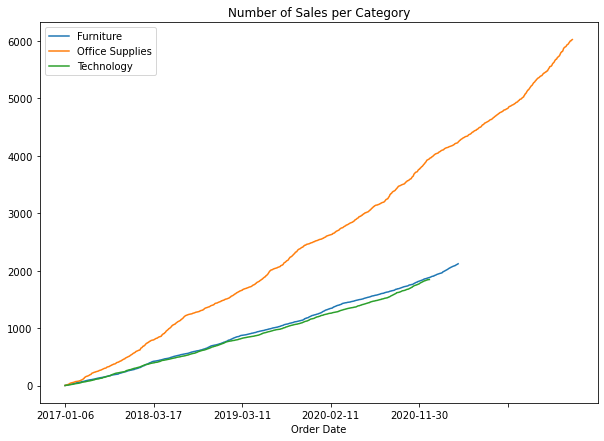

In [51]:
plt.figure(figsize=(10,7))
for cat in category:
    data = StorebyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    data.plot(kind='line', label=cat)
plt.title("Number of Sales per Category")
plt.legend()
plt.show()

- From the above graph we can see that there is rise of orders for every Category of Products.

# Time frame of data

In [17]:
# Check Min and Max dates
print(data['Order Date'].min())
print(data['Order Date'].max())

2017-01-03
2020-12-30


- Min and max is used to find out the exact order date and time of united states. The order data is from Jan 3, 2017 till Dec 12, 2020.

# Perform RFM Analysis

RFM (recency, frequency, monetary) analysis is a behavior based technique used to segment customers by examining their transaction history such as
- how recently a customer has purchased (recency)
- how often they purchase (frequency)
- how much the customer spends (monetary)

In [18]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2021, 1, 1)

# Convert date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [19]:
# Check Min and Max dates
print(data['Order Date'].min())
print(data['Order Date'].max())

2017-01-03 00:00:00
2020-12-30 00:00:00


In [20]:
data['Order ID'].value_counts().head()

CA-2020-100111    14
CA-2020-157987    12
US-2019-108504    11
CA-2019-165330    11
CA-2019-105732    10
Name: Order ID, dtype: int64

- The above code shows top five values of order id with order. Here we can observe that first order id has 14 different order while second has 12 order and so on.

In [21]:
orders = data.groupby(['Order ID', 'Order Date', 'Customer ID', 'Customer Name']).agg({'Sales': lambda x: x.sum()}).reset_index()
orders.head()

Order ID Order Date Customer ID     Customer Name    Sales
0  CA-2017-100006 2017-09-07    DK-13375       Dennis Kane  377.970
1  CA-2017-100090 2017-07-08    EB-13705        Ed Braxton  699.192
2  CA-2017-100293 2017-03-14    NF-18475  Neil Französisch   91.056
3  CA-2017-100328 2017-01-28    JC-15340   Jasper Cacioppo    3.928
4  CA-2017-100363 2017-04-08    JM-15655       Jim Mitchum   21.376

In [22]:
rfm= data.groupby('Customer Name').agg({'Order Date': lambda date: (PRESENT - date.max()).days,
                                        'Order ID': lambda num: len(num),
                                        'Sales': lambda price: price.sum()})

In [23]:
rfm

Order Date  Order ID     Sales
Customer Name                                     
Aaron Bergman              418         6   886.156
Aaron Hawkins               14        11  1744.700
Aaron Smayling              90        10  3050.692
Adam Bellavance             56        18  7755.620
Adam Hart                   36        20  3250.337
...                        ...       ...       ...
Xylona Preis                45        28  2374.658
Yana Sorensen               11        12  6720.444
Yoseph Carroll               6         8  5454.350
Zuschuss Carroll            56        31  8025.707
Zuschuss Donatelli         204         9  1493.944

[793 rows x 3 columns]

In [24]:
# Rename the columns 
rfm.columns=['recency','frequency','monetary']

In [25]:
rfm['recency'] = rfm['recency'].astype(int)

In [26]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [27]:
rfm.head()

recency  frequency  monetary
Customer Name                                
Aaron Bergman        418          6       886
Aaron Hawkins         14         11      1744
Aaron Smayling        90         10      3050
Adam Bellavance       56         18      7755
Adam Hart             36         20      3250

# Create Visuals

- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data

Text(0, 0.5, 'Number of transactions')

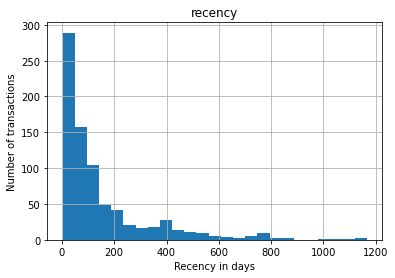

In [28]:
# Histogram for Recency Data 
rfm.hist(column='recency', bins=25)
plt.xlabel('Recency in days')
plt.ylabel('Number of Customers')

- Above histogram has right-skewed distribution as it is biased toward left side with number of transactions. We can see that in united states we have maximum customer with highest number of transaction which is between 0-280. Based on that we can say that we have high customer within last 160 days, i.e, around last 4 months.

Text(0, 0.5, 'Number of customers')

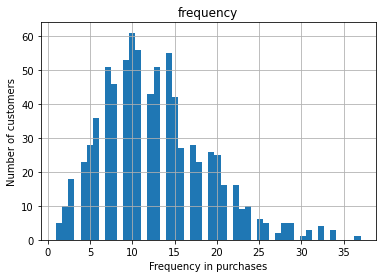

In [28]:
# Histogram for Frequency Data 

rfm.hist(column='frequency', bins=50)
plt.xlabel('Frequency in purchases')
plt.ylabel('Number of customers')

- The histogram has skewed distribution.We can see that in united states maximum customer who purchases lies between 5-20.

In [29]:
# Histogram for Monetary Data (US)
rfm.hist(column='monetary', bins=50)
plt.xlabel('Monetory Value')
plt.ylabel('Number of customers')

Text(0, 0.5, 'Number of customers')

- The histogram has right-skewed distribution and we can see that customer spending is less than $5000.

In [31]:
rfm.sort_values(by=['monetary'], inplace=True)

In [32]:
rfm.tail()

recency  frequency  monetary
Customer Name                              
Adrian Barton       43         20     14473
Tom Ashbrook        71         10     14595
Raymond Buch        98         18     15117
Tamara Chand       402         12     19052
Sean Miller         81         15     25043

# Normalize the Data

In [33]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[1.13317674 1.69953805 1.10100262]
 [2.18001246 1.85982987 1.10062196]
 [0.62854824 1.69953805 1.09643469]
 ...
 [0.273341   0.86513117 4.65191431]
 [1.35864905 0.09661979 6.14981202]
 [0.3646036  0.38425569 8.43034701]]


In [34]:
rfm1=rfm

# Calculate the RFM Score

In [35]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 28.0, 0.4: 55.0, 0.6: 105.0, 0.8: 226.60000000000002},
 'frequency': {0.2: 7.0, 0.4: 10.0, 0.6: 13.0, 0.8: 18.0},
 'monetary': {0.2: 961.0, 0.4: 1738.8, 0.6: 2750.0, 0.8: 4282.0}}

In [36]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [37]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [38]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [39]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

recency  frequency  monetary  R  F  M RFM Score
Customer Name                                                   
Thais Sissman        360          2         4  1  1  1       111
Lela Donovan         555          1         5  1  1  1       111
Mitch Gastineau      266          2        16  1  1  1       111
Carl Jackson         368          1        16  1  1  1       111
Roy Skaria            21          3        22  5  1  1       511

In [40]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

recency  frequency  monetary  R  F  M RFM Score  \
Customer Name                                                      
Thais Sissman        360          2         4  1  1  1       111   
Lela Donovan         555          1         5  1  1  1       111   
Mitch Gastineau      266          2        16  1  1  1       111   
Carl Jackson         368          1        16  1  1  1       111   
Roy Skaria            21          3        22  5  1  1       511   

                       Segment  
Customer Name                   
Thais Sissman          at risk  
Lela Donovan           at risk  
Mitch Gastineau        at risk  
Carl Jackson           at risk  
Roy Skaria       new customers

In [41]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose         35
new customers       40
needs attention     96
loyal customers    137
champions          204
at risk            281
Name: Segment, dtype: int64

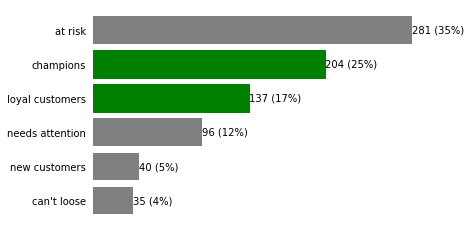

In [42]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

- We can tell from above graph that about 35% customer are at risk i.e., purchased often but a long time ago followed by 25% champions which are considered as best customer as they are heavy spenders and also they can be considered as most loyal customers as they have the habit to order. There are 17% loyal customer who buy on regular basis. There are only 5% customers who comes in new customer category while around 12% customer who needs attention. Few loyal customer still stick with the product which is good thing. There are around 4% customers who we can't loose, although the last shopping date of customers is on average and they havn't made purchase recently. These customers used to purchase frequently but haven't returned for a long time. For this reason, we need to give some discount or gift card.

In [43]:
# Best Customers
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score    Segment
Customer Name                                                             
Sanjit Engle         11         19     12209  5  5  5       555  champions
John Lee             23         34      9799  5  5  5       555  champions
Pete Kriz            11         25      8646  5  5  5       555  champions
Harry Marie           4         20      8236  5  5  5       555  champions
Lena Creighton       18         23      7663  5  5  5       555  champions

In [71]:
# Customers likely to Churn
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score      Segment
Customer Name                                                              
Tamara Chand       402         12     19052  1  3  5       135      at risk
Sanjit Chand       352         22     14142  1  5  5       155  can't loose
Becky Martin       310         16     11789  1  4  5       145      at risk
Clay Ludtke        286         28     10880  1  5  5       155  can't loose
Bill Shonely       561          9     10501  1  2  5       125      at risk

In [72]:
# Customers we are going to loose

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score  Segment
Customer Name                                                             
Nicole Brennan       1167          2       273  1  1  1       111  at risk
Ricardo Emerson      1099          1        48  1  1  1       111  at risk
Lycoris Saunders      779          6       368  1  1  1       111  at risk
Kelly Williams        773          5       449  1  1  1       111  at risk
Harold Dahlen         771          7       251  1  1  1       111  at risk

- Nicole, Ricardo, Lycoris, Kelly and Harold are Customers who are at risk has more chances to loose.

In [73]:
# Loyal Customers
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score  \
Customer Name                                                    
Sean Miller         81         15     25043  3  4  5       345   
Tamara Chand       402         12     19052  1  3  5       135   
Raymond Buch        98         18     15117  3  4  5       345   
Adrian Barton       43         20     14473  4  5  5       455   
Ken Lonsdale        49         29     14175  4  5  5       455   

                       Segment  
Customer Name                   
Sean Miller    loyal customers  
Tamara Chand           at risk  
Raymond Buch   loyal customers  
Adrian Barton  loyal customers  
Ken Lonsdale   loyal customers

- Sean, Tamara, Adrian and ken are our Loyal customer who buy on regular basis and spent the most. They are always with the company and buy often. We can ask their review and engage them with relevant product.

# Outliers

In [89]:
# Create box plots to check for outliers
rfm1.boxplot()

<AxesSubplot:>

# Performing cluster analysis using K-means clustering with the original rfm dataframe

In cluster analysis, the Elbow method is a heuristic used in determining the number of clusters in a data set.

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1

In [117]:
X = rfm1

In [118]:
X.head()

recency  frequency  monetary
Customer Name                                
Thais Sissman        360          2         4
Lela Donovan         555          1         5
Mitch Gastineau      266          2        16
Carl Jackson         368          1        16
Roy Skaria            21          3        22

In [119]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\komal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [120]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [121]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [122]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [123]:
rfm.head()

recency  frequency  monetary  Cluster_ID
Customer Name                                            
Thais Sissman        360          2         4           2
Lela Donovan         555          1         5           2
Mitch Gastineau      266          2        16           2
Carl Jackson         368          1        16           2
Roy Skaria            21          3        22           2

# Plot the graphs

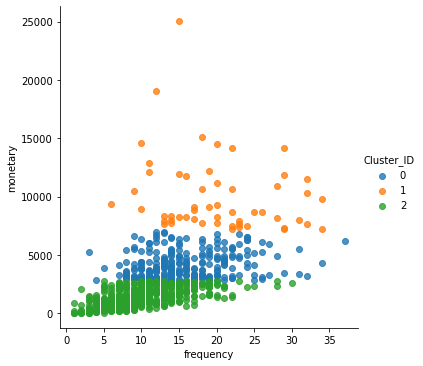

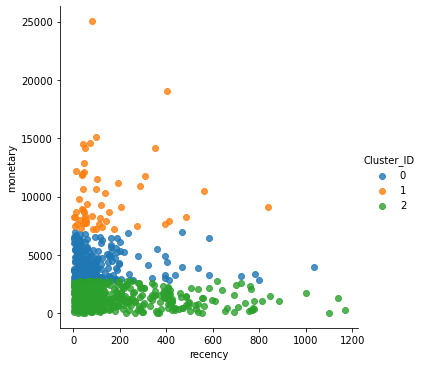

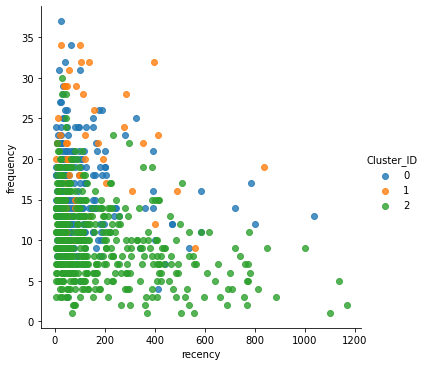

In [124]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

##### Frequency vs Monetory

In this plot the blue cluster customers are more scattered, these customers has the high frequency value which means these are the customers who spend more and shop more frequently whereas green cluster customers are the ones who spend more though the frequency is less compared to the orange cluster customers. Orange cluster customers are the ones who spend and shop less frequently compared to the other two clusters.

###### Recency vs Monetory

In this plot blue cluster customers are who's recency is above 180 yet monetory value is low with value between 2500-5500 that means cutomer buy recently by there purchase of amount is not too high. Most of green cluster customers recency is around 200 but they are more scattered and monetory value is about 2500 . Orange cluster customers monetory value is more (between 5500-10000) compared to the other two cluster groups but the recency value is less compared to other groups most of the customers recency value is between 0 - 100.

##### Recency vs Frequency

In this plot the recency value of blue cluster customer ranges from 0-500 and frequency is 0-35 which means customer buy recently and frequently. Green cluster customer recency ranges from 0-800 and frequency is 0-25 and above. Orange cluster customer recency ranges from 10-35 and frequency ranges from 0- 150.

# Perform Cluster Analysis with k=4

In [125]:
X1 = rfm_clean

C:\Users\komal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


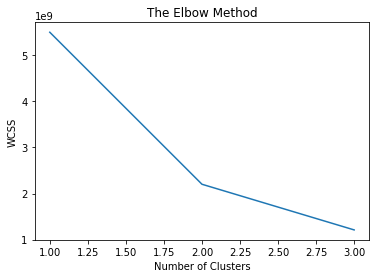

In [126]:
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters =i, 
                    init = 'k-means++', 
                    max_iter =300, n_init =10, 
                    random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Performing cluster analysis with the outliers removed rfm dataframe and Following exact same steps including the elbow method and then plotting the graphs 

In [127]:
X1.head()

recency  frequency  monetary
Customer Name                                
Thais Sissman        360          2         4
Lela Donovan         555          1         5
Mitch Gastineau      266          2        16
Carl Jackson         368          1        16
Roy Skaria            21          3        22

C:\Users\komal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


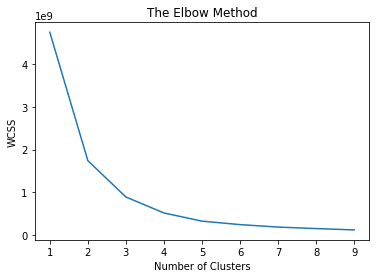

In [128]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [129]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [130]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

<ipython-input-131-1675166c0176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans


In [132]:
rfm_clean.head()


recency  frequency  monetary  Cluster_ID
Customer Name                                            
Thais Sissman        360          2         4           0
Lela Donovan         555          1         5           0
Mitch Gastineau      266          2        16           0
Carl Jackson         368          1        16           0
Roy Skaria            21          3        22           0

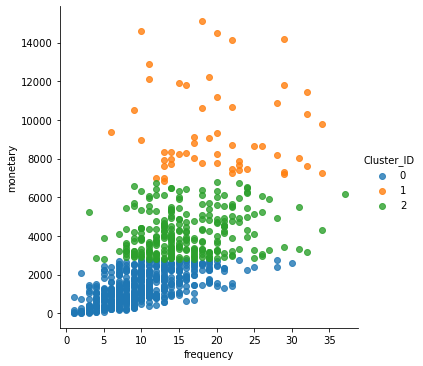

In [133]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

##### Frequency vs Monetory

In this plot the blue cluster customers are more scattered, these customers has the high frequency value which means these are the customers who spend more and shop more frequently whereas green cluster customers are the ones who spend more though the frequency is less compared to the orange cluster customers. Orange cluster customers are the ones who spend and shop less frequently compared to the other two clusters.

###### Recency vs Monetory

In this plot blue cluster customers are who's recency is above 180 yet monetory value is low with value between 2500-5500 that means cutomer buy recently by there purchase of amount is not too high. Most of green cluster customers recency is around 200 but they are more scattered and monetory value is about 2500 . Orange cluster customers monetory value is more (between 5500-10000) compared to the other two cluster groups but the recency value is less compared to other groups most of the customers recency value is between 0 - 100.

##### Recency vs Frequency

In this plot the recency value of blue cluster customer ranges from 0-500 and frequency is 0-35 which means customer buy recently and frequently. Green cluster customer recency ranges from 0-800 and frequency is 0-25 and above. Orange cluster customer recency ranges from 10-35 and frequency ranges from 0- 150.

## Calculating the mean for every cluster

In [173]:
for i in range(4): rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

recency  frequency     monetary
Cluster_ID                                    
0           158.809598  11.267802  1924.484520
1           103.565517  18.537931  6962.027586

## Performing cluster analysis using hierarchical clustering with the cleaned rfm dataframe

 A dendrogram is a type of tree diagram showing hierarchical clustering - relationships between similar sets of data.

In [174]:
# Import the libraries
import scipy.cluster.hierarchy as sch

In [175]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [176]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [137]:
X1['Cluster_ID'] = y_hc

<ipython-input-137-343db62683d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [138]:
X1.head()

recency  frequency  monetary  Cluster_ID
Customer Name                                            
Thais Sissman        360          2         4           0
Lela Donovan         555          1         5           0
Mitch Gastineau      266          2        16           0
Carl Jackson         368          1        16           0
Roy Skaria            21          3        22           0

## Creating all the three plots again and observing if there is any differences from k-means clustering method

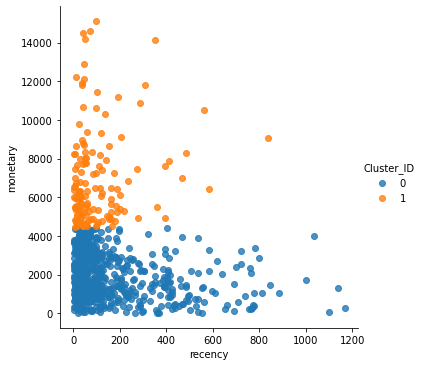

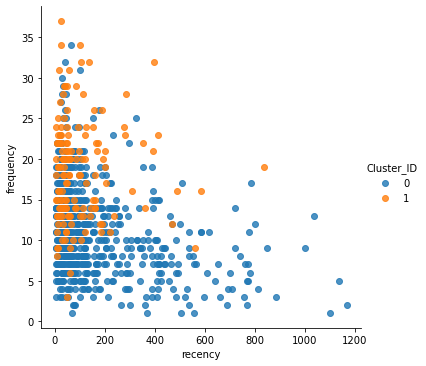

In [139]:
# Create a plot for frequency vs monetary 

facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs monetary

facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs frequency

facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

The difference between k fold and above plots is that there are only two clusters created, whereas in K folds there might be 'k' number of clusters.

## Evaluate Clustering

In [140]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [141]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

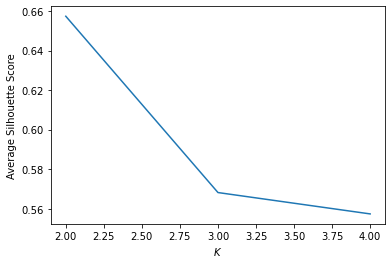

In [142]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

# Time Series Trends
- Number of orders
- Revenue

In [181]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = data.set_index('Order Date')['Order ID'].resample('M').nunique()

In [182]:
m_orders_df

Order Date
2017-01-31     32
2017-02-28     28
2017-03-31     71
2017-04-30     66
2017-05-31     69
2017-06-30     66
2017-07-31     65
2017-08-31     72
2017-09-30    130
2017-10-31     78
2017-11-30    151
2017-12-31    141
2018-01-31     29
2018-02-28     36
2018-03-31     79
2018-04-30     72
2018-05-31     74
2018-06-30     68
2018-07-31     66
2018-08-31     68
2018-09-30    140
2018-10-31     87
2018-11-30    158
2018-12-31    161
2019-01-31     48
2019-02-28     45
2019-03-31     86
2019-04-30     89
2019-05-31    108
2019-06-30     97
2019-07-31     96
2019-08-31     90
2019-09-30    192
2019-10-31    105
2019-11-30    183
2019-12-31    176
2020-01-31     69
2020-02-29     53
2020-03-31    118
2020-04-30    116
2020-05-31    118
2020-06-30    133
2020-07-31    111
2020-08-31    111
2020-09-30    226
2020-10-31    147
2020-11-30    261
2020-12-31    224
Freq: M, Name: Order ID, dtype: int64

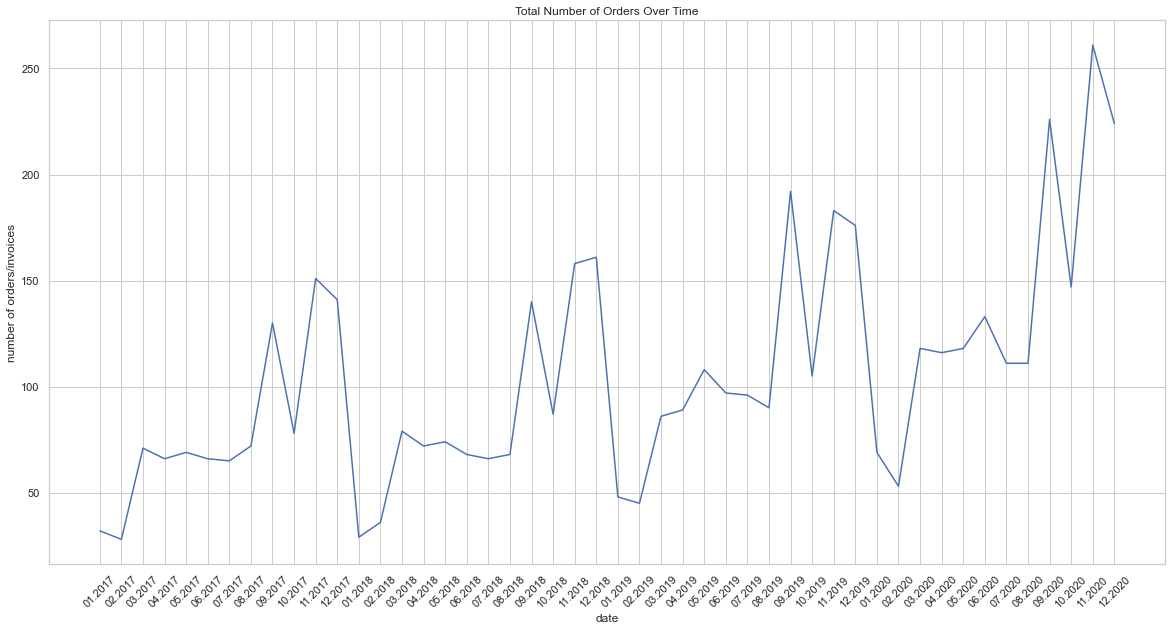

In [185]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(20,10),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

- The monthly number of orders seems to float around 25 from Jan 2017 to Feb 2017 then increases significantly till August 2017, then it decreases gradually till Jan 2018. Sales rise significantly from Jan 2018 to September 2018 then it shows decrement and again increase from September till December 2018. Overall, we can conclude that sales rise from Jan to Sept for all years and then gradually decrease till December.

In [189]:
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = data.set_index('Order Date')['Sales'].resample('M').sum()

In [190]:
m_revenue_df

Order Date
2017-01-31     14236.8950
2017-02-28      4519.8920
2017-03-31     55691.0090
2017-04-30     28295.3450
2017-05-31     23648.2870
2017-06-30     34595.1276
2017-07-31     33946.3930
2017-08-31     27909.4685
2017-09-30     81777.3508
2017-10-31     31453.3930
2017-11-30     78628.7167
2017-12-31     69545.6205
2018-01-31     18174.0756
2018-02-28     11951.4110
2018-03-31     38726.2520
2018-04-30     34195.2085
2018-05-31     30131.6865
2018-06-30     24797.2920
2018-07-31     28765.3250
2018-08-31     36898.3322
2018-09-30     64595.9180
2018-10-31     31404.9235
2018-11-30     75972.5635
2018-12-31     74919.5212
2019-01-31     18542.4910
2019-02-28     22978.8150
2019-03-31     51715.8750
2019-04-30     38750.0390
2019-05-31     56987.7280
2019-06-30     40344.5340
2019-07-31     39261.9630
2019-08-31     31115.3743
2019-09-30     73410.0249
2019-10-31     59687.7450
2019-11-30     79411.9658
2019-12-31     96999.0430
2020-01-31     43971.3740
2020-02-29     20301.1334
2

In [194]:
# Create a Line Plot for revenue
# Create a Line Plot for revenue
# Create the line chart again
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(20,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(m_revenue_df.values)+40000])

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

- We can see a similar pattern to the previous monthly Total Number of orders over time chart in this monthly revenue chart. 

# Repeat Customers

Here we are going to look at the number of monthly repeat purchases. This means a customer have placed more than one order within given month.

In [196]:
# Aggregate the raw data for each Order ID(Invoice_df).
invoice_df = data.groupby(
    by=['Order ID', 'Order Date']
).agg({
    'Sales': sum,
    'Customer ID': max,
    'Customer Name': max,
}).reset_index()

In [197]:
invoice_df.head()

Order ID Order Date    Sales Customer ID     Customer Name
0  CA-2017-100006 2017-09-07  377.970    DK-13375       Dennis Kane
1  CA-2017-100090 2017-07-08  699.192    EB-13705        Ed Braxton
2  CA-2017-100293 2017-03-14   91.056    NF-18475  Neil Französisch
3  CA-2017-100328 2017-01-28    3.928    JC-15340   Jasper Cacioppo
4  CA-2017-100363 2017-04-08   21.376    JM-15655       Jim Mitchum

In [207]:
# Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('Order Date').groupby([
    pd.Grouper(freq='M'), 'Customer Name'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer Name']

In [208]:
m_repeat_customers_df

Order Date
2017-02-28     1
2017-03-31     2
2017-04-30     2
2017-05-31     2
2017-06-30     2
2017-07-31     0
2017-08-31     2
2017-09-30    11
2017-10-31     3
2017-11-30    12
2017-12-31     6
2018-01-31     1
2018-02-28     0
2018-03-31     2
2018-04-30     3
2018-05-31     5
2018-06-30     0
2018-07-31     2
2018-08-31     4
2018-09-30    13
2018-10-31     7
2018-11-30    12
2018-12-31    16
2019-01-31     2
2019-02-28     3
2019-03-31     6
2019-04-30     6
2019-05-31    12
2019-06-30     7
2019-07-31     7
2019-08-31     4
2019-09-30    15
2019-10-31     9
2019-11-30    17
2019-12-31    17
2020-01-31     2
2020-02-29     0
2020-03-31     3
2020-04-30     7
2020-05-31     5
2020-06-30    15
2020-07-31     9
2020-08-31     7
2020-09-30    27
2020-10-31     9
2020-11-30    39
2020-12-31    25
Freq: M, Name: Customer Name, dtype: int64

In [203]:
# Calculate the unique customers
m_unique_customers_df = data.set_index('Order Date')['Customer Name'].resample('M').nunique()

In [204]:
m_unique_customers_df

Order Date
2017-01-31     32
2017-02-28     27
2017-03-31     69
2017-04-30     64
2017-05-31     67
2017-06-30     63
2017-07-31     65
2017-08-31     70
2017-09-30    118
2017-10-31     75
2017-11-30    139
2017-12-31    134
2018-01-31     28
2018-02-28     36
2018-03-31     77
2018-04-30     69
2018-05-31     69
2018-06-30     68
2018-07-31     64
2018-08-31     64
2018-09-30    126
2018-10-31     79
2018-11-30    146
2018-12-31    141
2019-01-31     46
2019-02-28     42
2019-03-31     80
2019-04-30     83
2019-05-31     96
2019-06-30     90
2019-07-31     89
2019-08-31     86
2019-09-30    176
2019-10-31     95
2019-11-30    165
2019-12-31    157
2020-01-31     67
2020-02-29     53
2020-03-31    115
2020-04-30    109
2020-05-31    113
2020-06-30    118
2020-07-31    102
2020-08-31    104
2020-09-30    196
2020-10-31    136
2020-11-30    216
2020-12-31    195
Freq: M, Name: Customer Name, dtype: int64

In [206]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage = (m_repeat_customers_df/m_unique_customers_df)*100.0
m_repeat_percentage

Order Date
2017-01-31          NaN
2017-02-28     3.703704
2017-03-31     2.898551
2017-04-30     3.125000
2017-05-31     2.985075
2017-06-30     3.174603
2017-07-31     0.000000
2017-08-31     2.857143
2017-09-30     9.322034
2017-10-31     4.000000
2017-11-30     8.633094
2017-12-31     4.477612
2018-01-31     3.571429
2018-02-28     0.000000
2018-03-31     2.597403
2018-04-30     4.347826
2018-05-31     7.246377
2018-06-30     0.000000
2018-07-31     3.125000
2018-08-31     6.250000
2018-09-30    10.317460
2018-10-31     8.860759
2018-11-30     8.219178
2018-12-31    11.347518
2019-01-31     4.347826
2019-02-28     7.142857
2019-03-31     7.500000
2019-04-30     7.228916
2019-05-31    12.500000
2019-06-30     7.777778
2019-07-31     7.865169
2019-08-31     4.651163
2019-09-30     8.522727
2019-10-31     9.473684
2019-11-30    10.303030
2019-12-31    10.828025
2020-01-31     2.985075
2020-02-29     0.000000
2020-03-31     2.608696
2020-04-30     6.422018
2020-05-31     4.424779
2020-

In [210]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(15,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

- As we can see from this chart, the numbers of both repeat and all customers start to rise significantly from  Nov 11,2017 and then it decreases suddenly and again shows increment. The percentage of Repeat customers seems to stay pretty consistent.

In [212]:
# Calculate Monthly revenue of repeat customers
m_rev_repeat_customers_df = invoice_df.set_index('Order Date').groupby([
    pd.Grouper(freq='M'), 'Customer Name'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df * 100.0

In [213]:
m_rev_perc_repeat_customers_df

Order Date
2017-01-31          NaN
2017-02-28     1.397379
2017-03-31     1.636979
2017-04-30     4.566914
2017-05-31    11.018980
2017-06-30     4.077594
2017-07-31     0.000000
2017-08-31     1.305636
2017-09-30    29.868653
2017-10-31     2.974267
2017-11-30     9.343025
2017-12-31    14.558651
2018-01-31    10.161802
2018-02-28     0.000000
2018-03-31     4.788220
2018-04-30     7.865482
2018-05-31    13.820220
2018-06-30     0.000000
2018-07-31     1.450594
2018-08-31    17.098467
2018-09-30    18.454606
2018-10-31    15.918730
2018-11-30    17.596681
2018-12-31    24.517870
2019-01-31     2.355908
2019-02-28     3.272980
2019-03-31     8.057497
2019-04-30     6.876917
2019-05-31    19.554419
2019-06-30     6.488368
2019-07-31    14.701967
2019-08-31     8.385488
2019-09-30     8.472715
2019-10-31    10.237596
2019-11-30    28.573569
2019-12-31    24.935213
2020-01-31     1.268362
2020-02-29     0.000000
2020-03-31     4.846550
2020-04-30     7.543893
2020-05-31     3.918596
2020-

In [218]:
# Plot the  chart for Revenue and % (Dual axis chart)

plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(15,7))

pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)
plot1.set_xlabel('date')
plot1.set_ylabel('sales')
plot1.set_title('Total Revenue vs. Revenue from Repeat Customers')

plot1.legend(['Total Revenue', 'Repeat Customer Revenue'])

plot1.set_ylim([0, max(m_revenue_df.values)+100000])

plot2.set_ylim([0, 35])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in m_rev_perc_repeat_customers_df.index
])

plt.show()

- We can see similar pattern as before for some months and there is significant increase in the revenue from Feb 2017 till March 2017 and then shows decrement and then again increase in August 2017 and like this trend is increasing and decreasing. In this graph we can see that total revenue is from repeat customers. This shows how important it is to retain existing customers.

## Trending Items Over Time (How customers enagage with individual products)

In [221]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(data.set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product Name'
    ])['Quantity'].sum()
                        )
m_item_df

Quantity
Order Date Product Name                                                
2017-01-31 3-ring staple pack                                         3
           4009 Highlighters by Sanford                               5
           AT&T 841000 Phone                                          3
           Acco Four Pocket Poly Ring Binder with Label Ho...         7
           Acco Pressboard Covers with Storage Hooks, 9 1/...         5
...                                                                 ...
2020-12-31 Xerox Color Copier Paper, 11" x 17", Ream                  5
           XtraLife ClearVue Slant-D Ring Binder, White, 3"           2
           Zipper Ring Binder Pockets                                 6
           iHome FM Clock Radio with Lightning Dock                   2
           iKross Bluetooth Portable Keyboard + Cell Phone...         4

[9250 rows x 1 columns]

In [229]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2017-01-31'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_m_sorted_df

Order Date                                       Product Name  Quantity
0  2017-01-31                          Macally Suction Cup Mount        13
1  2017-01-31  GBC Standard Recycled Report Covers, Clear Pla...        10
2  2017-01-31            Global Deluxe High-Back Manager's Chair         9
3  2017-01-31                SAFCO Commercial Wire Shelving, 72h         8
4  2017-01-31  Acco Four Pocket Poly Ring Binder with Label H...         7
..        ...                                                ...       ...
72 2017-01-31  Recycled Steel Personal File for Hanging File ...         1
73 2017-01-31  Pressboard Covers with Storage Hooks, 9 1/2" x...         1
74 2017-01-31          GBC DocuBind TL200 Manual Binding Machine         1
75 2017-01-31                                          Avery 482         1
76 2017-01-31  Howard Miller 11-1/2" Diameter Ridgewood Wall ...         1

[77 rows x 3 columns]

## Choropleth map

It is difficult to plot a map since the state abbreviation or latitude and longitude are not provided. As a result, the state abbreviations are appended to the appropriate states, and a choropleth map is created.

In [1]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [22]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = data.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)

sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [23]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

### By Sales

In [226]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_rev_df = pd.DataFrame(data.set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product Name'
    ])['Sales'].sum())
                 

# Lets find out what items were sold the most by sales on November 30, 2011
last_m_rev_sorted_df = m_rev_df.loc['2017-01-31'].sort_values(
    by='Sales', ascending=False
).reset_index()

In [227]:
# Print both the dataframes
print(last_m_sorted_df.head())
print(last_m_rev_sorted_df.head())

  Order Date                                       Product Name  Quantity
0 2017-01-31                          Macally Suction Cup Mount        13
1 2017-01-31  GBC Standard Recycled Report Covers, Clear Pla...        10
2 2017-01-31            Global Deluxe High-Back Manager's Chair         9
3 2017-01-31                SAFCO Commercial Wire Shelving, 72h         8
4 2017-01-31  Acco Four Pocket Poly Ring Binder with Label H...         7
  Order Date                                       Product Name    Sales
0 2017-01-31            Global Deluxe High-Back Manager's Chair  2573.82
1 2017-01-31              Tennsco 6- and 18-Compartment Lockers  1325.85
2 2017-01-31  Hon 4700 Series Mobuis Mid-Back Task Chairs wi...  1067.94
3 2017-01-31  Wireless Extenders zBoost YX545 SOHO Signal Bo...   755.96
4 2017-01-31                                    Apple iPhone 5C   699.93


In [235]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    data.loc[
        data['Product Name'].isin(['Macally Suction Cup Mount','GBC Standard Recycled Report Covers, Clear Plastic Sheets' , "Global Deluxe High-Back Manager's Chair",'SAFCO Commercial Wire Shelving, 72h' , 'Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"'])
    ].set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product Name'
    ])['Sales'].sum()
)
m_item_df

Sales
Order Date Product Name                                                
2017-01-31 Acco Four Pocket Poly Ring Binder with Label Ho...    10.430
           GBC Standard Recycled Report Covers, Clear Plas...    32.340
           Global Deluxe High-Back Manager's Chair             2573.820
           Macally Suction Cup Mount                            155.350
           SAFCO Commercial Wire Shelving, 72h                  489.920
2017-02-28 GBC Standard Recycled Report Covers, Clear Plas...    17.248
2017-03-31 Global Deluxe High-Back Manager's Chair              457.568
2017-06-30 Global Deluxe High-Back Manager's Chair             2001.860
           SAFCO Commercial Wire Shelving, 72h                  306.200
2017-10-31 GBC Standard Recycled Report Covers, Clear Plas...    10.780
2017-11-30 GBC Standard Recycled Report Covers, Clear Plas...    17.248
2017-12-31 Global Deluxe High-Back Manager's Chair              600.558
           SAFCO Commercial Wire Shelving, 72h                  122.480
2018-01-31 GBC Standard Recycled Report Covers, Clear Plas...    32.340
2018-03-31 Global Deluxe High-Back Manager's Chair              915.136
2018-04-30 GBC Standard Recycled Report Covers, Clear Plas...     4.312
2018-09-30 Acco Four Pocket Poly Ring Binder with Label Ho...     4.470
2018-10-31 Acco Four Pocket Poly Ring Binder with Label Ho...    29.800
2019-01-31 GBC Standard Recycled Report Covers, Clear Plas...    43.120
           SAFCO Commercial Wire Shelving, 72h                  428.680
2019-03-31 Acco Four Pocket Poly Ring Binder with Label Ho...    29.800
           GBC Standard Recycled Report Covers, Clear Plas...     9.702
2019-06-30 Macally Suction Cup Mount                             38.240
2019-08-31 GBC Standard Recycled Report Covers, Clear Plas...     4.312
2019-10-31 Global Deluxe High-Back Manager's Chair              915.136
2019-11-30 GBC Standard Recycled Report Covers, Clear Plas...    10.780
           SAFCO Commercial Wire Shelving, 72h                   97.984
2019-12-31 Macally Suction Cup Mount                             28.680
2020-02-29 Global Deluxe High-Back Manager's Chair              600.558
2020-03-31 Global Deluxe High-Back Manager's Chair              600.558
2020-06-30 GBC Standard Recycled Report Covers, Clear Plas...    53.900
2020-07-31 Acco Four Pocket Poly Ring Binder with Label Ho...    29.800
2020-10-31 GBC Standard Recycled Report Covers, Clear Plas...    22.638
2020-12-31 Acco Four Pocket Poly Ring Binder with Label Ho...    17.880
           Macally Suction Cup Mount                             57.360

In [237]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('Order Date','Product Name').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('Order Date')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [238]:
itmes_df

Product Name  Acco Four Pocket Poly Ring Binder with Label Holder, Smoke, 1"  \
Order Date                                                                     
2017-01-31                                                10.43                
2017-02-28                                                 0.00                
2017-03-31                                                 0.00                
2017-06-30                                                 0.00                
2017-10-31                                                 0.00                
2017-11-30                                                 0.00                
2017-12-31                                                 0.00                
2018-01-31                                                 0.00                
2018-03-31                                                 0.00                
2018-04-30                                                 0.00                
2018-09-30                                                 4.47                
2018-10-31                                                29.80                
2019-01-31                                                 0.00                
2019-03-31                                                29.80                
2019-06-30                                                 0.00                
2019-08-31                                                 0.00                
2019-10-31                                                 0.00                
2019-11-30                                                 0.00                
2019-12-31                                                 0.00                
2020-02-29                                                 0.00                
2020-03-31                                                 0.00                
2020-06-30                                                 0.00                
2020-07-31                                                29.80                
2020-10-31                                                 0.00                
2020-12-31                                                17.88                

Product Name  GBC Standard Recycled Report Covers, Clear Plastic Sheets  \
Order Date                                                                
2017-01-31                                               32.340           
2017-02-28                                               17.248           
2017-03-31                                                0.000           
2017-06-30                                                0.000           
2017-10-31                                               10.780           
2017-11-30                                               17.248           
2017-12-31                                                0.000           
2018-01-31                                               32.340           
2018-03-31                                                0.000           
2018-04-30                                                4.312           
2018-09-30                                                0.000           
2018-10-31                                                0.000           
2019-01-31                                               43.120           
2019-03-31                                                9.702           
2019-06-30                                                0.000           
2019-08-31                                                4.312           
2019-10-31                                                0.000           
2019-11-30                                               10.780           
2019-12-31                                                0.000           
2020-02-29                                                0.000           
2020-03-31                                                0.000           
2020-06-30                                               53.900           
2020-07-31                             

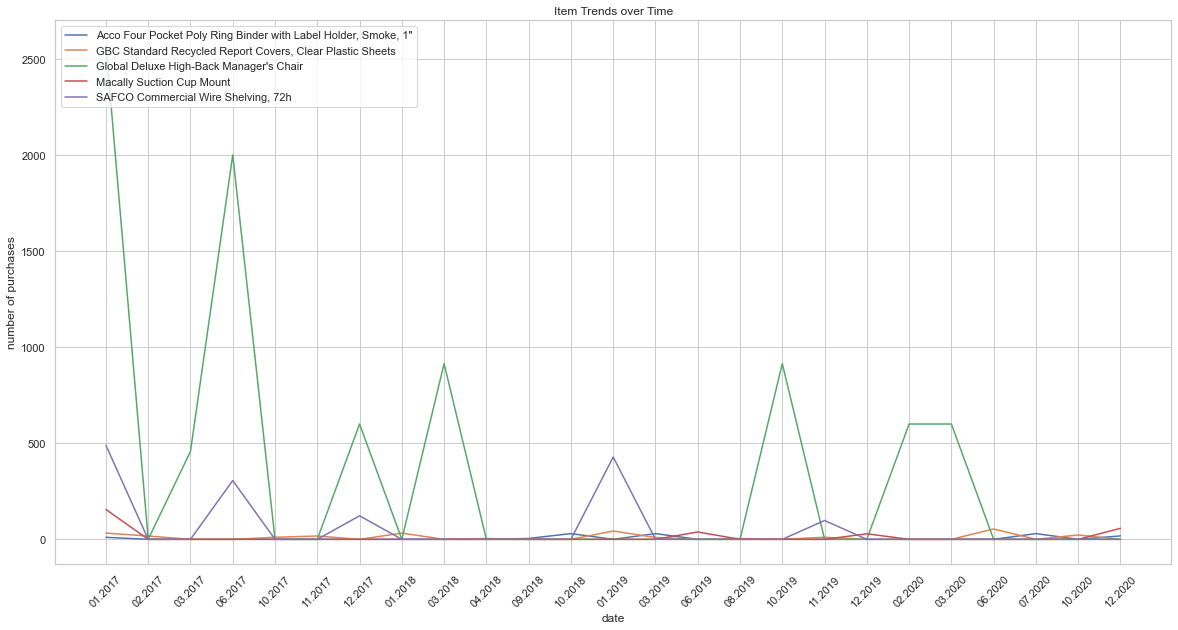

In [239]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(20,10),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

- The sales of Global Deluxe High-Back Manager's Chair product spiked in almost all years i.e. in 2017, 2018, 2019 and 2020. It could be an item that is highly sensitive to seasonality, such as this item is very popular from Feb 2017-June2017 and again in Nov 2017. The second popular product is Acco Four Pocket which has increment in sales from March 2017-June 2017 and then in Nov 2018 and so on.

In [240]:
print(last_m_rev_sorted_df.head())

  Order Date                                       Product Name    Sales
0 2017-01-31            Global Deluxe High-Back Manager's Chair  2573.82
1 2017-01-31              Tennsco 6- and 18-Compartment Lockers  1325.85
2 2017-01-31  Hon 4700 Series Mobuis Mid-Back Task Chairs wi...  1067.94
3 2017-01-31  Wireless Extenders zBoost YX545 SOHO Signal Bo...   755.96
4 2017-01-31                                    Apple iPhone 5C   699.93


In [241]:
# Use the top 5 items by sales and find the monthly sales for those items 
m_sales_df = pd.DataFrame(
    data.loc[
        data['Product Name'].isin(["Global Deluxe High-Back Manager's Chair",
                                   "Tennsco 6- and 18-Compartment Lockers", 
                                   "Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms", 
                                   "Wireless Extenders zBoost YX545 SOHO Signal Booster", 'Apple iPhone 5C'])
    ].set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product Name'
    ])['Sales'].sum()
)
m_sales_df

Sales
Order Date Product Name                                                
2017-01-31 Apple iPhone 5C                                      699.930
           Global Deluxe High-Back Manager's Chair             2573.820
           Hon 4700 Series Mobuis Mid-Back Task Chairs wit...  1067.940
           Tennsco 6- and 18-Compartment Lockers               1325.850
           Wireless Extenders zBoost YX545 SOHO Signal Boo...   755.960
2017-03-31 Global Deluxe High-Back Manager's Chair              457.568
           Tennsco 6- and 18-Compartment Lockers               2492.598
2017-06-30 Global Deluxe High-Back Manager's Chair             2001.860
           Wireless Extenders zBoost YX545 SOHO Signal Boo...  1322.930
2017-09-30 Tennsco 6- and 18-Compartment Lockers               1325.850
2017-12-31 Global Deluxe High-Back Manager's Chair              600.558
           Tennsco 6- and 18-Compartment Lockers                424.272
2018-03-31 Global Deluxe High-Back Manager's Chair              915.136
           Wireless Extenders zBoost YX545 SOHO Signal Boo...   453.576
2018-04-30 Apple iPhone 5C                                      239.976
2018-11-30 Tennsco 6- and 18-Compartment Lockers                795.510
2018-12-31 Apple iPhone 5C                                      159.984
           Tennsco 6- and 18-Compartment Lockers               1325.850
2019-06-30 Wireless Extenders zBoost YX545 SOHO Signal Boo...   566.970
2019-07-31 Hon 4700 Series Mobuis Mid-Back Task Chairs wit...   854.352
           Tennsco 6- and 18-Compartment Lockers                265.170
2019-08-31 Tennsco 6- and 18-Compartment Lockers               1591.020
2019-09-30 Hon 4700 Series Mobuis Mid-Back Task Chairs wit...   747.558
2019-10-31 Apple iPhone 5C                                      239.976
           Global Deluxe High-Back Manager's Chair              915.136
2019-11-30 Wireless Extenders zBoost YX545 SOHO Signal Boo...   491.374
2019-12-31 Hon 4700 Series Mobuis Mid-Back Task Chairs wit...  2563.056
           Wireless Extenders zBoost YX545 SOHO Signal Boo...   453.576
2020-02-29 Global Deluxe High-Back Manager's Chair              600.558
2020-03-31 Global Deluxe High-Back Manager's Chair              600.558
2020-04-30 Tennsco 6- and 18-Compartment Lockers                848.544
2020-05-31 Tennsco 6- and 18-Compartment Lockers                530.340
2020-08-31 Hon 4700 Series Mobuis Mid-Back Task Chairs wit...  2349.468

In [242]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
s_itmes_df = m_sales_df.reset_index().pivot('Order Date','Product Name').fillna(0)
s_itmes_df = s_itmes_df.reset_index()
s_itmes_df = s_itmes_df.set_index('Order Date')
s_itmes_df.columns = s_itmes_df.columns.droplevel(0)
s_itmes_df

Product Name  Apple iPhone 5C  Global Deluxe High-Back Manager's Chair  \
Order Date                                                               
2017-01-31            699.930                                 2573.820   
2017-03-31              0.000                                  457.568   
2017-06-30              0.000                                 2001.860   
2017-09-30              0.000                                    0.000   
2017-12-31              0.000                                  600.558   
2018-03-31              0.000                                  915.136   
2018-04-30            239.976                                    0.000   
2018-11-30              0.000                                    0.000   
2018-12-31            159.984                                    0.000   
2019-06-30              0.000                                    0.000   
2019-07-31              0.000                                    0.000   
2019-08-31              0.000                                    0.000   
2019-09-30              0.000                                    0.000   
2019-10-31            239.976                                  915.136   
2019-11-30              0.000                                    0.000   
2019-12-31              0.000                                    0.000   
2020-02-29              0.000                                  600.558   
2020-03-31              0.000                                  600.558   
2020-04-30              0.000                                    0.000   
2020-05-31              0.000                                    0.000   
2020-08-31              0.000                                    0.000   

Product Name  Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms  \
Order Date                                                                       
2017-01-31                                             1067.940                  
2017-03-31                                                0.000                  
2017-06-30                                                0.000                  
2017-09-30                                                0.000                  
2017-12-31                                                0.000                  
2018-03-31                                                0.000                  
2018-04-30                                                0.000                  
2018-11-30                                                0.000                  
2018-12-31                                                0.000                  
2019-06-30                                                0.000                  
2019-07-31                                              854.352                  
2019-08-31                                                0.000                  
2019-09-30                                              747.558                  
2019-10-31                                                0.000                  
2019-11-30                                                0.000                  
2019-12-31                                             2563.056                  
2020-02-29                                                0.000                  
2020-03-31                                                0.000                  
2020-04-30                                                0.000                  
2020-05-31                                                0.000                  
2020-08-31                                             2349.468                  

Product Name  Tennsco 6- and 18-Compartment Lockers  \
Order Date                                            
2017-01-31                                 1325.850   
2017-03-31                                 2492.598   
2017-06-30                                    0.000   
2017-09-30                                 1325.850   
2017-12-31                                  424.272   
2018-03-31               

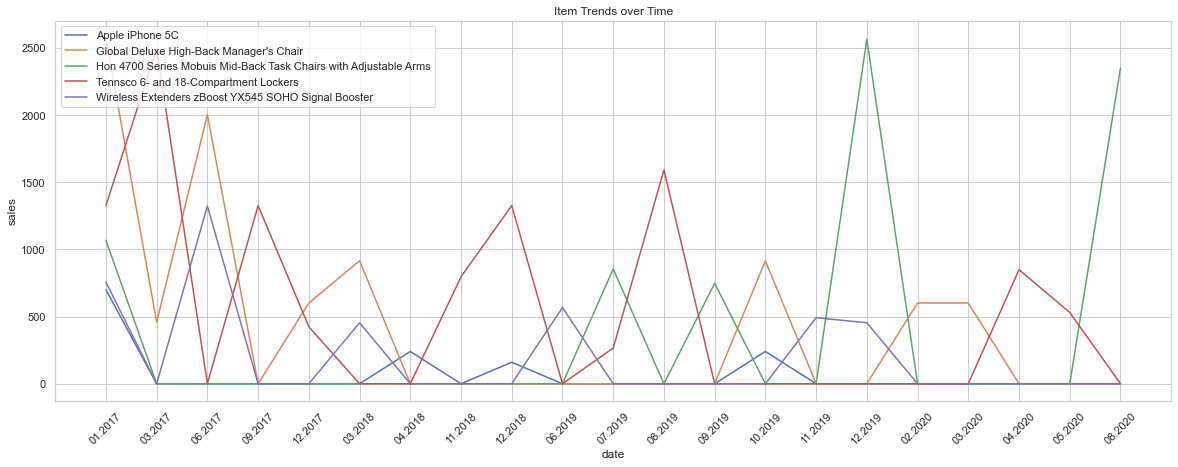

In [243]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(s_itmes_df.values).plot(
    figsize=(20,7),
    grid=True,
)

plot1.set_ylabel('sales')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(s_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(s_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in s_itmes_df.index], 
    rotation=45
)

plt.show()

In [306]:
 # Summarize the data for each order 

orders_df = df.groupby(['Customer Name', 'Order ID']).agg({
            'Sales': sum,
            'Order Date': max
        })

In [307]:
orders_df

Sales Order Date
Customer Name      Order ID                          
Aaron Bergman      CA-2017-152905   12.624 2017-02-18
                   CA-2017-156587  309.592 2017-03-07
                   CA-2019-140935  563.940 2019-11-10
Aaron Hawkins      CA-2017-113768  287.456 2017-05-13
                   CA-2017-122070  257.752 2017-04-22
...                                    ...        ...
Zuschuss Donatelli CA-2017-143336  244.760 2017-08-27
                   CA-2019-152471  839.944 2019-07-08
                   CA-2019-167682  331.080 2019-04-03
                   CA-2020-141481   61.440 2020-06-11
                   US-2019-147991   16.720 2019-05-05

[5009 rows x 2 columns]

# Calculate Frequency, Recency, and Total Amount of purchases by each customer

In [268]:
# Group first by Customer ID first and then aggregate by sales and Invoice Date
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'PurchaseDuration'
avg_frequency.__name__ = 'PurchaseFrequency'


summary_df = orders_df.reset_index().groupby('Customer Name').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'Order Date': [min, max, purchase_duration, avg_frequency]
})

In [269]:
summary_df.head()

Sales                                       Order Date  \
                    min       max       sum         avg count        min   
Customer Name                                                              
Aaron Bergman    12.624   563.940   886.156  295.385333   3.0 2017-02-18   
Aaron Hawkins    18.704   991.260  1744.700  249.242857   7.0 2017-04-22   
Aaron Smayling   31.400  1476.270  3050.692  435.813143   7.0 2017-07-27   
Adam Bellavance  18.540  4438.686  7755.620  969.452500   8.0 2018-09-18   
Adam Hart         3.008  1169.980  3250.337  325.033700  10.0 2017-11-16   

                                                               
                       max PurchaseDuration PurchaseFrequency  
Customer Name                                                  
Aaron Bergman   2019-11-10              995        331.666667  
Aaron Hawkins   2020-12-18             1336        190.857143  
Aaron Smayling  2020-10-03             1164        166.285714  
Adam Bellavance 2020-11-06              780         97.500000  
Adam Hart       2020-11-26             1106        110.600000

In [270]:
summary_df.rename(columns = {'Order Date':'OrderDate'}, inplace = True)

In [271]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   (Sales, min)                    793 non-null    float64       
 1   (Sales, max)                    793 non-null    float64       
 2   (Sales, sum)                    793 non-null    float64       
 3   (Sales, avg)                    793 non-null    float64       
 4   (Sales, count)                  793 non-null    float64       
 5   (OrderDate, min)                793 non-null    datetime64[ns]
 6   (OrderDate, max)                793 non-null    datetime64[ns]
 7   (OrderDate, PurchaseDuration)   793 non-null    int64         
 8   (OrderDate, PurchaseFrequency)  793 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 62.0+ KB


In [272]:
# Distribution of the number of purchases that the repeat customers have made
summary_df.columns = ['_'.join(col) for col in summary_df.columns]
summary_df = summary_df.loc[summary_df['OrderDate_PurchaseDuration'] > 1]

In [275]:
summary_df.head()

Sales_min  Sales_max  Sales_sum   Sales_avg  Sales_count  \
Customer Name                                                               
Aaron Bergman       12.624    563.940    886.156  295.385333          3.0   
Aaron Hawkins       18.704    991.260   1744.700  249.242857          7.0   
Aaron Smayling      31.400   1476.270   3050.692  435.813143          7.0   
Adam Bellavance     18.540   4438.686   7755.620  969.452500          8.0   
Adam Hart            3.008   1169.980   3250.337  325.033700         10.0   

                OrderDate_min OrderDate_max  OrderDate_PurchaseDuration  \
Customer Name                                                             
Aaron Bergman      2017-02-18    2019-11-10                         995   
Aaron Hawkins      2017-04-22    2020-12-18                        1336   
Aaron Smayling     2017-07-27    2020-10-03                        1164   
Adam Bellavance    2018-09-18    2020-11-06                         780   
Adam Hart          2017-11-16    2020-11-26                        1106   

                 OrderDate_PurchaseFrequency  
Customer Name                                 
Aaron Bergman                     331.666667  
Aaron Hawkins                     190.857143  
Aaron Smayling                    166.285714  
Adam Bellavance                    97.500000  
Adam Hart                         110.600000

In [276]:
# Group by sales_count and plot the sales_count with customers with more than 1 purchase

ax = summary_df.groupby('Sales_count').count()[:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(20,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

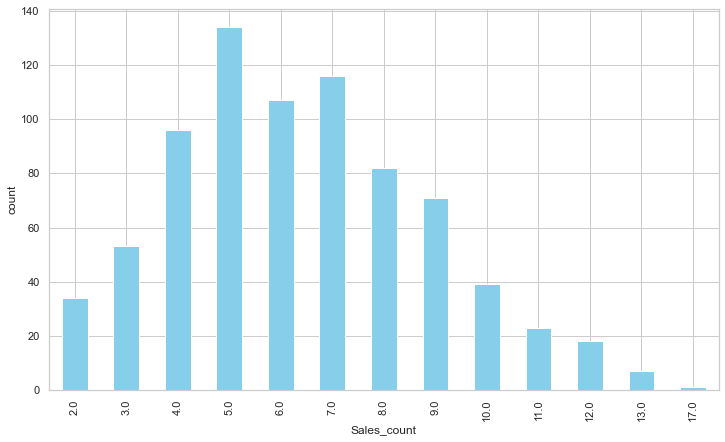

In [277]:
ax = summary_df.groupby('Sales_count').count()['Sales_sum'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

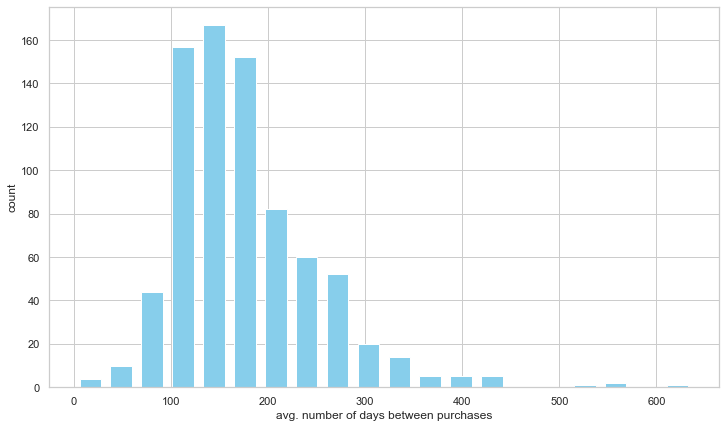

In [279]:
# Average number of days between purchases for these repeat customers

ax = summary_df['OrderDate_PurchaseFrequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predict 3 Month Customer Lifetime Value (CLV)

In [280]:
clv_freq = '3M'

In [308]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5009 entries, ('Aaron Bergman', 'CA-2017-152905') to ('Zuschuss Donatelli', 'US-2019-147991')
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sales       5009 non-null   float64       
 1   Order Date  5009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3+ KB


In [309]:
orders_df.head()

Sales Order Date
Customer Name Order ID                          
Aaron Bergman CA-2017-152905   12.624 2017-02-18
              CA-2017-156587  309.592 2017-03-07
              CA-2019-140935  563.940 2019-11-10
Aaron Hawkins CA-2017-113768  287.456 2017-05-13
              CA-2017-122070  257.752 2017-04-22

In [320]:
# Break down data into 3 months chunk
# https://pbpython.com/pandas-grouper-agg.html more info 
data_df = orders_df.reset_index().groupby([
    'Customer Name',
    pd.Grouper(key='Order Date', freq='3M')
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})
data_df.columns = ['_'.join(col) for col in data_df.columns]

In [321]:
data_df = data_df.reset_index()

In [322]:
data_df.head(10)

Customer Name Order Date  Sales_sum  Sales_avg  Sales_count
0   Aaron Bergman 2017-04-30    322.216    161.108          2.0
1   Aaron Bergman 2020-01-31    563.940    563.940          1.0
2   Aaron Hawkins 2017-04-30    257.752    257.752          1.0
3   Aaron Hawkins 2017-07-31    287.456    287.456          1.0
4   Aaron Hawkins 2017-10-31     49.408     49.408          1.0
5   Aaron Hawkins 2018-01-31     53.670     53.670          1.0
6   Aaron Hawkins 2019-01-31    991.260    991.260          1.0
7   Aaron Hawkins 2019-04-30     86.450     86.450          1.0
8   Aaron Hawkins 2021-01-31     18.704     18.704          1.0
9  Aaron Smayling 2017-07-31     65.780     65.780          1.0

In [323]:
# Encode the OrderDate column
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['Order Date'].unique(), reverse=True)
    )
}

data_df['M'] = data_df['Order Date'].apply(lambda x: date_month_map[str(x)[:10]])

In [324]:
data_df.head(10)

Customer Name Order Date  Sales_sum  Sales_avg  Sales_count     M
0   Aaron Bergman 2017-04-30    322.216    161.108          2.0  M_16
1   Aaron Bergman 2020-01-31    563.940    563.940          1.0   M_5
2   Aaron Hawkins 2017-04-30    257.752    257.752          1.0  M_16
3   Aaron Hawkins 2017-07-31    287.456    287.456          1.0  M_15
4   Aaron Hawkins 2017-10-31     49.408     49.408          1.0  M_14
5   Aaron Hawkins 2018-01-31     53.670     53.670          1.0  M_13
6   Aaron Hawkins 2019-01-31    991.260    991.260          1.0   M_9
7   Aaron Hawkins 2019-04-30     86.450     86.450          1.0   M_8
8   Aaron Hawkins 2021-01-31     18.704     18.704          1.0   M_1
9  Aaron Smayling 2017-07-31     65.780     65.780          1.0  M_15

In [325]:
# Transform this data into tabular data, where the rows represent the individual customers and the columns represent each feature using Pivot table
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['Sales_sum', 'Sales_avg', 'Sales_count'], 
    columns='M', 
    index='Customer Name'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]

In [326]:
features_df = features_df.fillna(0)

In [327]:
features_df.head()

Sales_avg_M_10  Sales_avg_M_11  Sales_avg_M_12  \
Customer Name                                                     
Aaron Bergman              0.00             0.0             0.0   
Aaron Hawkins              0.00             0.0             0.0   
Aaron Smayling             0.00             0.0             0.0   
Adam Bellavance           18.54             0.0             0.0   
Adam Hart                  0.00             0.0             0.0   

                 Sales_avg_M_13  Sales_avg_M_14  Sales_avg_M_15  \
Customer Name                                                     
Aaron Bergman              0.00           0.000           0.000   
Aaron Hawkins             53.67          49.408         287.456   
Aaron Smayling             0.00           0.000          65.780   
Adam Bellavance            0.00           0.000           0.000   
Adam Hart                  5.22           0.000           0.000   

                 Sales_avg_M_16  Sales_avg_M_17  Sales_avg_M_2  Sales_avg_M_3  \
Customer Name                                                                   
Aaron Bergman           161.108             0.0         0.0000           0.00   
Aaron Hawkins           257.752             0.0         0.0000           0.00   
Aaron Smayling            0.000             0.0       578.5440           0.00   
Adam Bellavance           0.000             0.0        20.7360          79.99   
Adam Hart                 0.000             0.0       684.7355         342.24   

                 ...  Sales_sum_M_16  Sales_sum_M_17  Sales_sum_M_2  \
Customer Name    ...                                                  
Aaron Bergman    ...         322.216             0.0          0.000   
Aaron Hawkins    ...         257.752             0.0          0.000   
Aaron Smayling   ...           0.000             0.0       1735.632   
Adam Bellavance  ...           0.000             0.0         20.736   
Adam Hart        ...           0.000             0.0       1369.471   

                 Sales_sum_M_3  Sales_sum_M_4  Sales_sum_M_5  Sales_sum_M_6  \
Customer Name                                                                 
Aaron Bergman             0.00           0.00        563.940          0.000   
Aaron Hawkins             0.00           0.00          0.000          0.000   
Aaron Smayling            0.00           0.00        740.214        477.666   
Adam Bellavance          79.99           0.00          0.000       4466.616   
Adam Hart               342.24         196.45        217.440        841.568   

                 Sales_sum_M_7  Sales_sum_M_8  Sales_sum_M_9  
Customer Name                                                 
Aaron Bergman              0.0           0.00          0.000  
Aaron Hawkins              0.0          86.45        991.260  
Aaron Smayling             0.0          31.40          0.000  
Adam Bellavance            0.0         334.20          0.000  
Adam Hart                262.1           0.00          3.008  

[5 rows x 48 columns]

In [329]:
# last 3 months 'M1' group and Sales_sum as the target variable as we want to prdict sales for 3 months
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['Customer Name', 'Sales_sum']
]

response_df.columns = ['Customer Name', 'CLV_'+'3M']

In [330]:
response_df.head(10)

Customer Name    CLV_3M
8        Aaron Hawkins    18.704
19     Adam Bellavance  2835.538
28           Adam Hart    12.840
36  Adam Shillingsburg    34.650
44       Adrian Barton   843.840
52        Adrian Shami    54.640
57         Aimee Bixby   138.696
63         Alan Barnes    39.792
68      Alan Dominguez  1080.550
72         Alan Haines    16.030

In [332]:
# Combine the 2 sets together
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='Customer Name',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)

In [333]:
sample_set_df.head()

Sales_avg_M_10  Sales_avg_M_11  Sales_avg_M_12  Sales_avg_M_13  \
NaN             0.00             0.0             0.0            0.00   
8.0             0.00             0.0             0.0           53.67   
NaN             0.00             0.0             0.0            0.00   
19.0           18.54             0.0             0.0            0.00   
28.0            0.00             0.0             0.0            5.22   

      Sales_avg_M_14  Sales_avg_M_15  Sales_avg_M_16  Sales_avg_M_17  \
NaN            0.000           0.000         161.108             0.0   
8.0           49.408         287.456         257.752             0.0   
NaN            0.000          65.780           0.000             0.0   
19.0           0.000           0.000           0.000             0.0   
28.0           0.000           0.000           0.000             0.0   

      Sales_avg_M_2  Sales_avg_M_3  ...  Sales_sum_M_2  Sales_sum_M_3  \
NaN          0.0000           0.00  ...          0.000           0.00   
8.0          0.0000           0.00  ...          0.000           0.00   
NaN        578.5440           0.00  ...       1735.632           0.00   
19.0        20.7360          79.99  ...         20.736          79.99   
28.0       684.7355         342.24  ...       1369.471         342.24   

      Sales_sum_M_4  Sales_sum_M_5  Sales_sum_M_6  Sales_sum_M_7  \
NaN            0.00        563.940          0.000            0.0   
8.0            0.00          0.000          0.000            0.0   
NaN            0.00        740.214        477.666            0.0   
19.0           0.00          0.000       4466.616            0.0   
28.0         196.45        217.440        841.568          262.1   

      Sales_sum_M_8  Sales_sum_M_9    Customer Name    CLV_3M  
NaN            0.00          0.000    Aaron Bergman     0.000  
8.0           86.45        991.260    Aaron Hawkins    18.704  
NaN           31.40          0.000   Aaron Smayling     0.000  
19.0         334.20          0.000  Adam Bellavance  2835.538  
28.0           0.00          3.008        Adam Hart    12.840  

[5 rows x 50 columns]

# Linear Regression

In [334]:
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+'3M'
all_features = [x for x in sample_set_df.columns if x not in ['Customer Name', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.2
)

In [335]:
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [336]:
# Calculate the intercept
reg_fit.intercept_

349.3595627546025

In [337]:
# Calculate the coefficient
reg_fit.coef_

array([-1.95326358e-01,  1.89462944e-01,  7.50507327e-02, -1.89004557e-01,
        1.39771974e-02,  3.76936493e-01,  9.96795789e-01,  5.37691304e-01,
       -3.41579290e-02, -3.01236773e-01,  2.28083394e-02, -3.25069093e-02,
       -5.91284279e-01, -5.27444890e-01,  5.49186155e-01,  7.77458443e-02,
       -3.77369375e+01,  6.13645115e+00,  4.22177281e+01, -1.92108664e+01,
       -1.54570381e+01,  1.56986495e+02, -4.43440662e+01, -1.36528946e+02,
       -6.83905331e+01, -8.53498167e+01,  1.10205867e+01, -2.05345152e+01,
       -2.44424537e+01,  1.55704530e+01,  8.01871463e+00,  9.25791534e+00,
        1.92237218e-01, -1.79714129e-01, -6.75746787e-02,  1.84677778e-01,
       -1.02039831e-02, -3.16488753e-01, -9.80000573e-01,  5.37691304e-01,
        2.77501250e-02,  2.94816303e-01, -3.36084754e-02,  2.99936546e-02,
        5.60954783e-01,  2.24799545e-01, -5.83900560e-01, -7.08695577e-02])

In [338]:
coef=pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns =['feature', 'coef']
coef

feature        coef
0     Sales_avg_M_10   -0.195326
1     Sales_avg_M_11    0.189463
2     Sales_avg_M_12    0.075051
3     Sales_avg_M_13   -0.189005
4     Sales_avg_M_14    0.013977
5     Sales_avg_M_15    0.376936
6     Sales_avg_M_16    0.996796
7     Sales_avg_M_17    0.537691
8      Sales_avg_M_2   -0.034158
9      Sales_avg_M_3   -0.301237
10     Sales_avg_M_4    0.022808
11     Sales_avg_M_5   -0.032507
12     Sales_avg_M_6   -0.591284
13     Sales_avg_M_7   -0.527445
14     Sales_avg_M_8    0.549186
15     Sales_avg_M_9    0.077746
16  Sales_count_M_10  -37.736938
17  Sales_count_M_11    6.136451
18  Sales_count_M_12   42.217728
19  Sales_count_M_13  -19.210866
20  Sales_count_M_14  -15.457038
21  Sales_count_M_15  156.986495
22  Sales_count_M_16  -44.344066
23  Sales_count_M_17 -136.528946
24   Sales_count_M_2  -68.390533
25   Sales_count_M_3  -85.349817
26   Sales_count_M_4   11.020587
27   Sales_count_M_5  -20.534515
28   Sales_count_M_6  -24.442454
29   Sales_count_M_7   15.570453
30   Sales_count_M_8    8.018715
31   Sales_count_M_9    9.257915
32    Sales_sum_M_10    0.192237
33    Sales_sum_M_11   -0.179714
34    Sales_sum_M_12   -0.067575
35    Sales_sum_M_13    0.184678
36    Sales_sum_M_14   -0.010204
37    Sales_sum_M_15   -0.316489
38    Sales_sum_M_16   -0.980001
39    Sales_sum_M_17    0.537691
40     Sales_sum_M_2    0.027750
41     Sales_sum_M_3    0.294816
42     Sales_sum_M_4   -0.033608
43     Sales_sum_M_5    0.029994
44     Sales_sum_M_6    0.560955
45     Sales_sum_M_7    0.224800
46     Sales_sum_M_8   -0.583901
47     Sales_sum_M_9   -0.070870

# Evaluate the Regression Model performance

In [339]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [340]:
from sklearn.metrics import r2_score, median_absolute_error

In [341]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.0876
Out-of-Sample R-Squared: -0.4045


In [342]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 270.3646
Out-of-Sample MSE: 275.7847


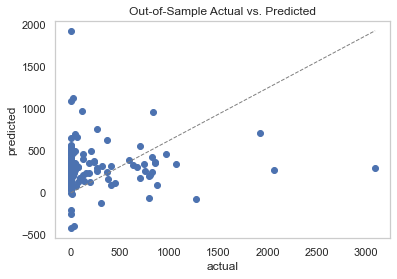

In [343]:
# scatter plot of predicted versus actual.
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()